<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#สรุปข้อมูลของนักประเมินแต่ละคน 
    โดยพิจารณาจากความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน',skiprows=0)
df2 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน',skiprows=0)
df3 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='คอนโด',skiprows=0)
df4 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม',skiprows=0)
df5 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์',skiprows=0)

In [3]:
df1.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

In [4]:
df2.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [5]:
df3.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
dtype: bool

In [6]:
df4.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [7]:
df5.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

#ข้อมูลประเมิน(บ้าน)

In [10]:
df1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [11]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
a1 = df1[df1['ID ผู้ประเมิน']==1]
a1.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         0
Unnamed: 13                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินบ้านไว้ทั้งหมด 100 ทรัพย์

In [12]:
a1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100.0,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,4.316360e+06,3.938500e+06,NaN,NaN,NaN,NaN,100.0
std,0.0,2.865391e+06,2.368553e+06,NaN,NaN,NaN,NaN,NaN
min,1.0,3.900000e+05,6.000000e+05,NaN,NaN,NaN,NaN,100.0
25%,1.0,2.892750e+06,2.775000e+06,NaN,NaN,NaN,NaN,100.0
50%,1.0,3.962000e+06,3.600000e+06,NaN,NaN,NaN,NaN,100.0
75%,1.0,5.000000e+06,4.500000e+06,NaN,NaN,NaN,NaN,100.0
max,1.0,2.094900e+07,1.600000e+07,NaN,NaN,NaN,NaN,100.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์บ้านของคนที่ 1 = 600000
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์บ้านของคนที่ 1 = 16000000

In [14]:
a1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [15]:
a1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [16]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
a2 = df1[df1['ID ผู้ประเมิน']==2]
a2.count()

ID ผู้ประเมิน                     90
post id                           90
property_type                     90
ความมั่นใจในการเมินราคาทรัพย์     90
ราคาทรัพย์                        90
ประเมินราคาซื้อ-ขาย               89
ปัจจัยในการประเมินราคาซื้อ-ขาย    89
เหตุผลไม่มั่นใจราคาประเมิน         1
ให้คะแนนทรัพย์                    89
Unnamed: 9                         0
Unnamed: 10                        0
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินบ้านไว้ทั้งหมด 90 ทรัพย์

In [17]:
a2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,90.0,9.000000e+01,8.900000e+01,0.0,0.0,0.0,0.0,0.0
mean,2.0,4.240733e+06,4.153258e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,2.714815e+06,2.386901e+06,NaN,NaN,NaN,NaN,NaN
min,2.0,3.900000e+05,9.900000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,2.860000e+06,2.600000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,4.000000e+06,3.900000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,5.000000e+06,4.900000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,2.094900e+07,1.700000e+07,NaN,NaN,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์บ้านของคนที่ 2 = 9900000
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์บ้านของคนที่ 2 = 17000000

In [18]:
a2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [19]:
a2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


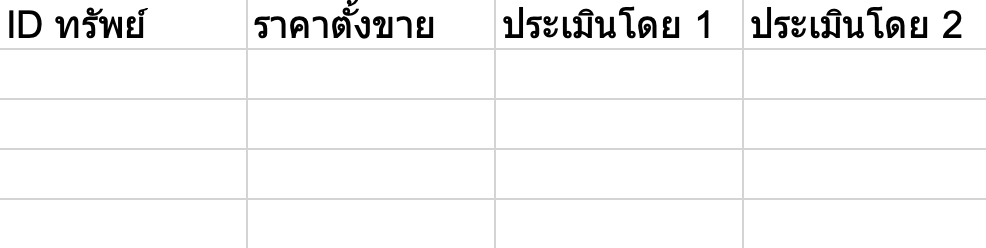

In [20]:
a2['ประเมิน1'] = a2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
a2.head()

<ipython-input-20-a52e573bc7b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2['ประเมิน1'] = a2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0


###rename column

In [22]:
a2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

### select columns

In [23]:
home = a2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
home

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


####Drop NaN

In [24]:
home.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2       True
dtype: bool

In [25]:
home = home.dropna()
home

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [26]:
home.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error 
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 12.321512246130807
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 10.417687099245775
* หมายความว่า ผู้ประเมินคนที่ 2 สามารถประเมินราคาทรัพย์(บ้าน)ได้ใกล้เคียงกว่าคนที่1

In [27]:
actual = home['ราคาทรัพย์']
pred1 = home['ประเมิน1']
pred2 = home['ประเมิน2']

In [28]:
import numpy as np

def mape(actual, pred1): 
    actual, pred1 = np.array(actual), np.array(pred1)
    return np.mean(np.abs((actual - pred1) / actual)) * 100
mape(actual, pred1)

12.321512246130807

In [29]:
import numpy as np

def mape(actual, pred2): 
    actual, pred2 = np.array(actual), np.array(pred2)
    return np.mean(np.abs((actual - pred2) / actual)) * 100
mape(actual, pred2)

10.417687099245775

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 13.055527046371376
- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 8.521474003880796

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = home['ประเมิน1']
y_pred = home['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

13.055527046371376

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = home['ประเมิน2']
y_pred = home['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

8.521474003880796

##MAPE ผู้ประเมินเทียบผู้ประเมิน

หา mean absolute percentage error

- โดยผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 13.626068116793128
- โดยผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 11.582834887783596

In [32]:
import numpy as np

def mape(pred1, pred2): 
    pred1, pred2 = np.array(pred1), np.array(pred2)
    return np.mean(np.abs((pred1 - pred2) / pred1)) * 100
mape(pred1, pred2)

13.626068116793128

In [33]:
import numpy as np

def mape(pred2, pred1): 
    pred2, pred1 = np.array(pred2), np.array(pred1)
    return np.mean(np.abs((pred2 - pred1) / pred2)) * 100
mape(pred2, pred1)

11.582834887783596

#ข้อมูลประเมิน(ที่ดิน)

In [34]:
df2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,3000000.0,12000-18000,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


##ผู้ประเมินคนที่ 1

In [35]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
t1 = df2[df2['ID ผู้ประเมิน']==1]
t1.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                         10
Unnamed: 10                        10
Unnamed: 11                         0
Unnamed: 12                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินที่ดินไว้ทั้งหมด 100 ทรัพย์

In [36]:
t1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,100.0,1.000000e+02,1.000000e+02,10.000000,0.0,1.0
mean,1.0,1.644375e+07,9.069000e+06,2.500000,NaN,100.0
std,0.0,4.202164e+07,2.322360e+07,0.527046,NaN,NaN
min,1.0,6.500000e+05,5.000000e+05,2.000000,NaN,100.0
25%,1.0,1.900000e+06,1.675000e+06,2.000000,NaN,100.0
50%,1.0,3.999500e+06,3.175000e+06,2.500000,NaN,100.0
75%,1.0,1.207500e+07,1.000000e+07,3.000000,NaN,100.0
max,1.0,2.860000e+08,2.220000e+08,3.000000,NaN,100.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 5.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 2.220000e+08	

In [37]:
t1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [38]:
t1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [39]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
t2 = df2[df2['ID ผู้ประเมิน']==2]
t2.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                         10
Unnamed: 10                        10
Unnamed: 11                         0
Unnamed: 12                         0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินที่ดินไว้ทั้งหมด 100 ทรัพย์

In [40]:
t2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,100.0,1.000000e+02,1.000000e+02,10.000000,0.0,0.0
mean,2.0,1.644375e+07,1.196550e+07,2.300000,NaN,NaN
std,0.0,4.202164e+07,2.843751e+07,0.483046,NaN,NaN
min,2.0,6.500000e+05,7.000000e+05,2.000000,NaN,NaN
25%,2.0,1.900000e+06,1.800000e+06,2.000000,NaN,NaN
50%,2.0,3.999500e+06,3.800000e+06,2.000000,NaN,NaN
75%,2.0,1.207500e+07,1.000000e+07,2.750000,NaN,NaN
max,2.0,2.860000e+08,2.500000e+08,3.000000,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 2 = 7.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 2 = 2.500000e+08

In [41]:
t2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [42]:
t2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 3

In [43]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
t3 = df2[df2['ID ผู้ประเมิน']==4]
t3.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย                7
ปัจจัยในการประเมินราคาซื้อ-ขาย     7
เหตุผลไม่มั่นใจราคาประเมิน         3
ให้คะแนนทรัพย์                     7
Unnamed: 9                         7
Unnamed: 10                        7
Unnamed: 11                        0
Unnamed: 12                        0
dtype: int64

ผู้ประเมินคนที่ 3 ประเมินที่ดินไว้ทั้งหมด 10 ทรัพย์

In [44]:
t3.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,10.0,1.000000e+01,7.000000e+00,7.000000,0.0,0.0
mean,4.0,2.191000e+07,7.000000e+06,2.714286,NaN,NaN
std,0.0,3.030465e+07,6.238322e+06,0.487950,NaN,NaN
min,4.0,2.200000e+06,2.500000e+06,2.000000,NaN,NaN
25%,4.0,3.750000e+06,3.500000e+06,2.500000,NaN,NaN
50%,4.0,9.350000e+06,4.500000e+06,3.000000,NaN,NaN
75%,4.0,1.610000e+07,7.500000e+06,3.000000,NaN,NaN
max,4.0,9.000000e+07,2.000000e+07,3.000000,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 3 = 2.500000e+06
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 3 = 2.000000e+07

In [45]:
t3['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       7
ไม่มั่นใจ    3
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [46]:
t3['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     5
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    2
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(ที่ดิน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


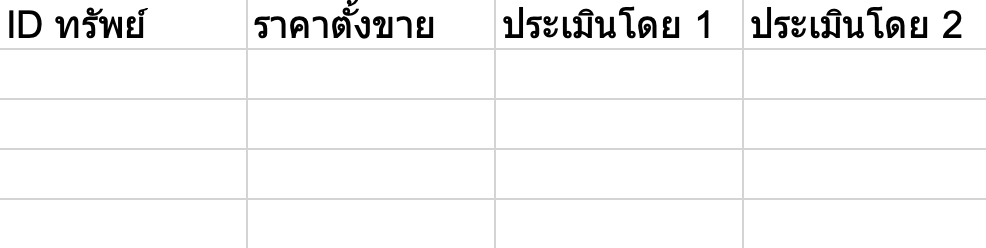

In [47]:
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
t2.head()

<ipython-input-47-d1663d6264be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,2200000.0


###rename column

In [48]:
t2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [49]:
land = t2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
land

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [50]:
land.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error 
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 41.33784259452896

- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 40.11878038284342

* หมายความว่า ผู้ประเมินคนที่ 2 สามารถประเมินราคาทรัพย์(ที่ดิน)ได้ใกล้เคียงกว่าคนที่ 1

In [51]:
actuall = land['ราคาทรัพย์']
pred11 = land['ประเมิน1']
pred22 = land['ประเมิน2']

In [52]:
import numpy as np

def mape(actuall, pred11): 
    actuall, pred11 = np.array(actuall), np.array(pred11)
    return np.mean(np.abs((actuall - pred11) / actuall)) * 100
mape(actuall, pred11)

41.33784259452896

In [53]:
import numpy as np

def mape(actuall, pred22): 
    actuall, pred22 = np.array(actuall), np.array(pred22)
    return np.mean(np.abs((actuall - pred22) / actuall)) * 100
mape(actuall, pred22)

40.11878038284342

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 83.48110682471777

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 48.37938341613725

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = land['ประเมิน1']
y_pred = land['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

83.48110682471777

In [55]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = land['ประเมิน2']
y_pred = land['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

48.37938341613725

##MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error

- โดยผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 74.07933970315449
- โดยผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 42.74775082762699

In [56]:
import numpy as np

def mape(pred11, pred22): 
    pred11, pred22 = np.array(pred11), np.array(pred22)
    return np.mean(np.abs((pred11 - pred22) / pred11)) * 100
mape(pred11, pred22)

74.07933970315449

In [57]:
import numpy as np

def mape(pred22, pred11): 
    pred22, pred11 = np.array(pred22), np.array(pred11)
    return np.mean(np.abs((pred22 - pred11) / pred22)) * 100
mape(pred22, pred11)

42.74775082762699

#ข้อมูลประเมิน(คอนโด)

In [58]:
df3.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


##ผู้ประเมินคนที่ 1

In [59]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
s1 = df3[df3['ID ผู้ประเมิน']==1]
s1.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินคอนโดไว้ทั้งหมด 10 ทรัพย์

In [60]:
s1.describe()

,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9
count,10.0,10.000000,1.000000e+01,1.000000e+01,0.0,10.000000
mean,1.0,1188.900000,2.387800e+06,2.275000e+06,NaN,3.900000
std,0.0,694.328845,1.076989e+06,6.705098e+05,NaN,0.316228
min,1.0,32.000000,1.280000e+06,1.500000e+06,NaN,3.000000
25%,1.0,801.000000,1.625000e+06,1.650000e+06,NaN,4.000000
50%,1.0,1526.000000,1.895000e+06,2.250000e+06,NaN,4.000000
75%,1.0,1640.750000,3.234500e+06,2.775000e+06,NaN,4.000000
max,1.0,1840.000000,4.290000e+06,3.500000e+06,NaN,4.000000


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 1.280000e+06	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 4.290000e+06

In [61]:
s1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [62]:
s1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

#ข้อมูลประเมิน(ทาวน์โฮม)

In [63]:
df4.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [64]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
c1 = df4[df4['ID ผู้ประเมิน']==1]
c1.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินทาวน์โฮมไว้ทั้งหมด 120 ทรัพย์

In [65]:
c1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,1.926117e+06,1.832750e+06,NaN,NaN,NaN,NaN,120.0
std,0.0,8.295864e+05,8.027065e+05,NaN,NaN,NaN,NaN,NaN
min,1.0,5.300000e+05,3.500000e+05,NaN,NaN,NaN,NaN,120.0
25%,1.0,1.345000e+06,1.300000e+06,NaN,NaN,NaN,NaN,120.0
50%,1.0,1.750000e+06,1.600000e+06,NaN,NaN,NaN,NaN,120.0
75%,1.0,2.437500e+06,2.500000e+06,NaN,NaN,NaN,NaN,120.0
max,1.0,4.730000e+06,4.200000e+06,NaN,NaN,NaN,NaN,120.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 1 = 3.500000e+05	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 1 = 4.200000e+06	

In [66]:
c1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [67]:
c1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [68]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
c2 = df4[df4['ID ผู้ประเมิน']==2]
c2.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินทาวน์โฮมไว้ทั้งหมด 120 ทรัพย์

In [69]:
c2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,0.0
mean,2.0,1.926117e+06,1.823083e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,8.295864e+05,7.744988e+05,NaN,NaN,NaN,NaN,NaN
min,2.0,5.300000e+05,4.000000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,1.345000e+06,1.200000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,1.750000e+06,1.700000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,2.437500e+06,2.300000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,4.730000e+06,4.000000e+06,NaN,NaN,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 2 = 4.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 2 = 4.000000e+06

In [70]:
c2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [71]:
c2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


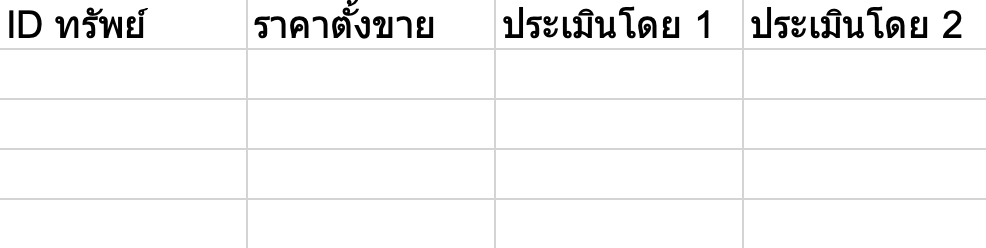

In [72]:
c2['ประเมิน1'] = c2['post id'].map(c1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
c2.head()

<ipython-input-72-2beab86c4d4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['ประเมิน1'] = c2['post id'].map(c1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0


###rename column

In [73]:
c2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [74]:
townhome = c2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
townhome

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [75]:
townhome.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error 
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 11.373507980201532
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 8.766742521930592
* หมายความว่า ผู้ประเมินคนที่ 2 สามารถประเมินราคาทรัพย์(ทาวน์โฮม)ได้ใกล้เคียงกว่าคนที่1

In [76]:
aactual = townhome['ราคาทรัพย์']
ppred1 = townhome['ประเมิน1']
ppred2 = townhome['ประเมิน2']

In [77]:
import numpy as np

def mape(aactual, ppred1): 
    aactual, ppred1 = np.array(aactual), np.array(ppred1)
    return np.mean(np.abs((aactual - ppred1) / aactual)) * 100
mape(aactual, ppred1)

11.373507980201532

In [78]:
import numpy as np

def mape(aactual, ppred2): 
    aactual, ppred2 = np.array(aactual), np.array(ppred2)
    return np.mean(np.abs((aactual - ppred2) / aactual)) * 100
mape(aactual, ppred2)

8.766742521930592

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 16.209125736159383

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.753580848193073


In [79]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน1']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

16.209125736159383

In [80]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน2']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.753580848193073

##MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน
หา mean absolute percentage error

- โดยผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 11.21168528826893

- โดยผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 10.619748830198178

In [81]:
import numpy as np

def mape(ppred1, ppred2): 
    ppred1, ppred2 = np.array(ppred1), np.array(ppred2)
    return np.mean(np.abs((ppred1 - ppred2) / ppred1)) * 100
mape(ppred1, ppred2)

11.21168528826893

In [82]:
import numpy as np

def mape(ppred2, ppred1): 
    ppred2, ppred1 = np.array(ppred2), np.array(ppred1)
    return np.mean(np.abs((ppred2 - ppred1) / ppred2)) * 100
mape(ppred2, ppred1)

10.619748830198178

#ข้อมูลประเมิน(อาคารพาณิชย์)

In [83]:
df5.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [84]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
b1 = df5[df5['ID ผู้ประเมิน']==1]
b1.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินอาคารพาณิชย์ไว้ทั้งหมด 10 ทรัพย์

In [85]:
b1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,1.0
mean,1.0,7.710000e+06,6.260000e+06,NaN,2.700000,NaN,NaN,10.0
std,0.0,5.926110e+06,3.913850e+06,NaN,0.823273,NaN,NaN,NaN
min,1.0,2.400000e+06,2.200000e+06,NaN,2.000000,NaN,NaN,10.0
25%,1.0,4.125000e+06,3.650000e+06,NaN,2.000000,NaN,NaN,10.0
50%,1.0,6.000000e+06,5.000000e+06,NaN,2.500000,NaN,NaN,10.0
75%,1.0,8.500000e+06,7.750000e+06,NaN,3.000000,NaN,NaN,10.0
max,1.0,2.250000e+07,1.350000e+07,NaN,4.000000,NaN,NaN,10.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 1 = 2.200000e+06	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 1 = 1.350000e+07	

In [86]:
b1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [87]:
b1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      2
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [88]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
b2 = df5[df5['ID ผู้ประเมิน']==2]
b2.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินอาคารพาณิชย์ไว้ทั้งหมด 10 ทรัพย์

In [89]:
b2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,0.0
mean,2.0,7.710000e+06,7.610000e+06,NaN,2.800000,NaN,NaN,NaN
std,0.0,5.926110e+06,5.408728e+06,NaN,0.918937,NaN,NaN,NaN
min,2.0,2.400000e+06,2.100000e+06,NaN,2.000000,NaN,NaN,NaN
25%,2.0,4.125000e+06,4.000000e+06,NaN,2.000000,NaN,NaN,NaN
50%,2.0,6.000000e+06,6.500000e+06,NaN,2.500000,NaN,NaN,NaN
75%,2.0,8.500000e+06,9.500000e+06,NaN,3.750000,NaN,NaN,NaN
max,2.0,2.250000e+07,2.000000e+07,NaN,4.000000,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 2 = 2.100000e+06
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 2 = 2.000000e+07	

In [90]:
b2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [91]:
b2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      3
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     2
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


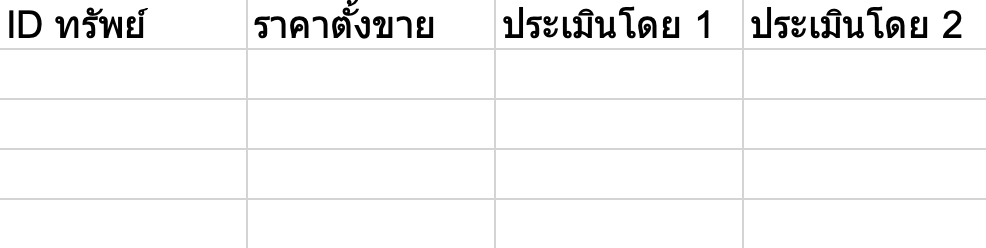

In [92]:
b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
b2.head()

<ipython-input-92-5730ce203b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0


###rename column

In [93]:
b2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [94]:
build = b2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
build

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [95]:
build.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error 
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 17.643894993894996
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 11.732295482295482
* หมายความว่า ผู้ประเมินคนที่ 2 สามารถประเมินราคาทรัพย์(อาคารพาณิชย์)ได้ใกล้เคียงกว่าคนที่1

In [96]:
true = build['ราคาทรัพย์']
pre1 = build['ประเมิน1']
pre2 = build['ประเมิน2']

In [97]:
import numpy as np

def mape(true, pre1): 
    true, pre1 = np.array(true), np.array(pre1)
    return np.mean(np.abs((true - pre1) / true)) * 100
mape(true, pre1)

17.643894993894996

In [98]:
import numpy as np

def mape(true, pre2): 
    true, pre2 = np.array(true), np.array(pre2)
    return np.mean(np.abs((true - pre2) / true)) * 100
mape(true, pre2)

11.732295482295482

##MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error

- โดยผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 21.58208906103643
- โดยผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 16.97142857142857


In [99]:
import numpy as np

def mape(pre1, pre2): 
    pre1, pre2 = np.array(pre1), np.array(pre2)
    return np.mean(np.abs((pre1 - pre2) / pre1)) * 100
mape(pre1, pre2)

21.58208906103643

In [100]:
import numpy as np

def mape(pre2, pre1): 
    pre2, pre1 = np.array(pre2), np.array(pre1)
    return np.mean(np.abs((pre2 - pre1) / pre2)) * 100
mape(pre2, pre1)

16.97142857142857

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 25.4518341307815

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.428571428571429


In [101]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = build['ประเมิน1']
y_pred = build['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

25.4518341307815

In [102]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = build['ประเมิน2']
y_pred = build['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.428571428571429